In [1]:
import pandas as pd

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.14/data_sum.xlsx")

##
data

,FORCE_C(Left),X COORDINATE_C(Left),Y COORDINATE_C(Left),FSR DATA_C(Left),FORCE_B(Right),FSR DATA_B(Right)
0,1.245014,1.529382,-0.886157,1.361804,2.277552,1.757358
1,1.274000,1.749337,-1.368345,1.264316,2.319914,1.524890
2,1.389941,1.748738,-1.086286,1.166829,2.447001,1.524890
3,1.254676,1.777098,-1.389048,0.874366,2.531726,1.292421
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
608,2.037281,0.870283,0.317515,1.069341,1.472665,-0.334861
609,1.969648,0.872209,0.349021,1.166829,0.413604,-0.102392
610,1.998633,1.085799,0.020937,1.069341,1.345578,0.362545
611,1.902016,0.930805,0.082657,0.776878,1.049041,1.059952


In [2]:
data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.14/squart.xlsx")

R2=data2.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
R_scaled=scaler.fit_transform(R2)

R3=pd.DataFrame(data=R_scaled)

R_new=R3.set_axis(["FORCE_B(Right)","FSR DATA_B(Right)"],axis="columns")

In [3]:
data.columns

Index(['FORCE_C(Left)', 'X COORDINATE_C(Left)', 'Y COORDINATE_C(Left)',
       'FSR DATA_C(Left)', 'FORCE_B(Right)', 'FSR DATA_B(Right)'],
      dtype='object')

In [4]:
R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left)','FSR DATA_C(Left)']]

<Axes: >

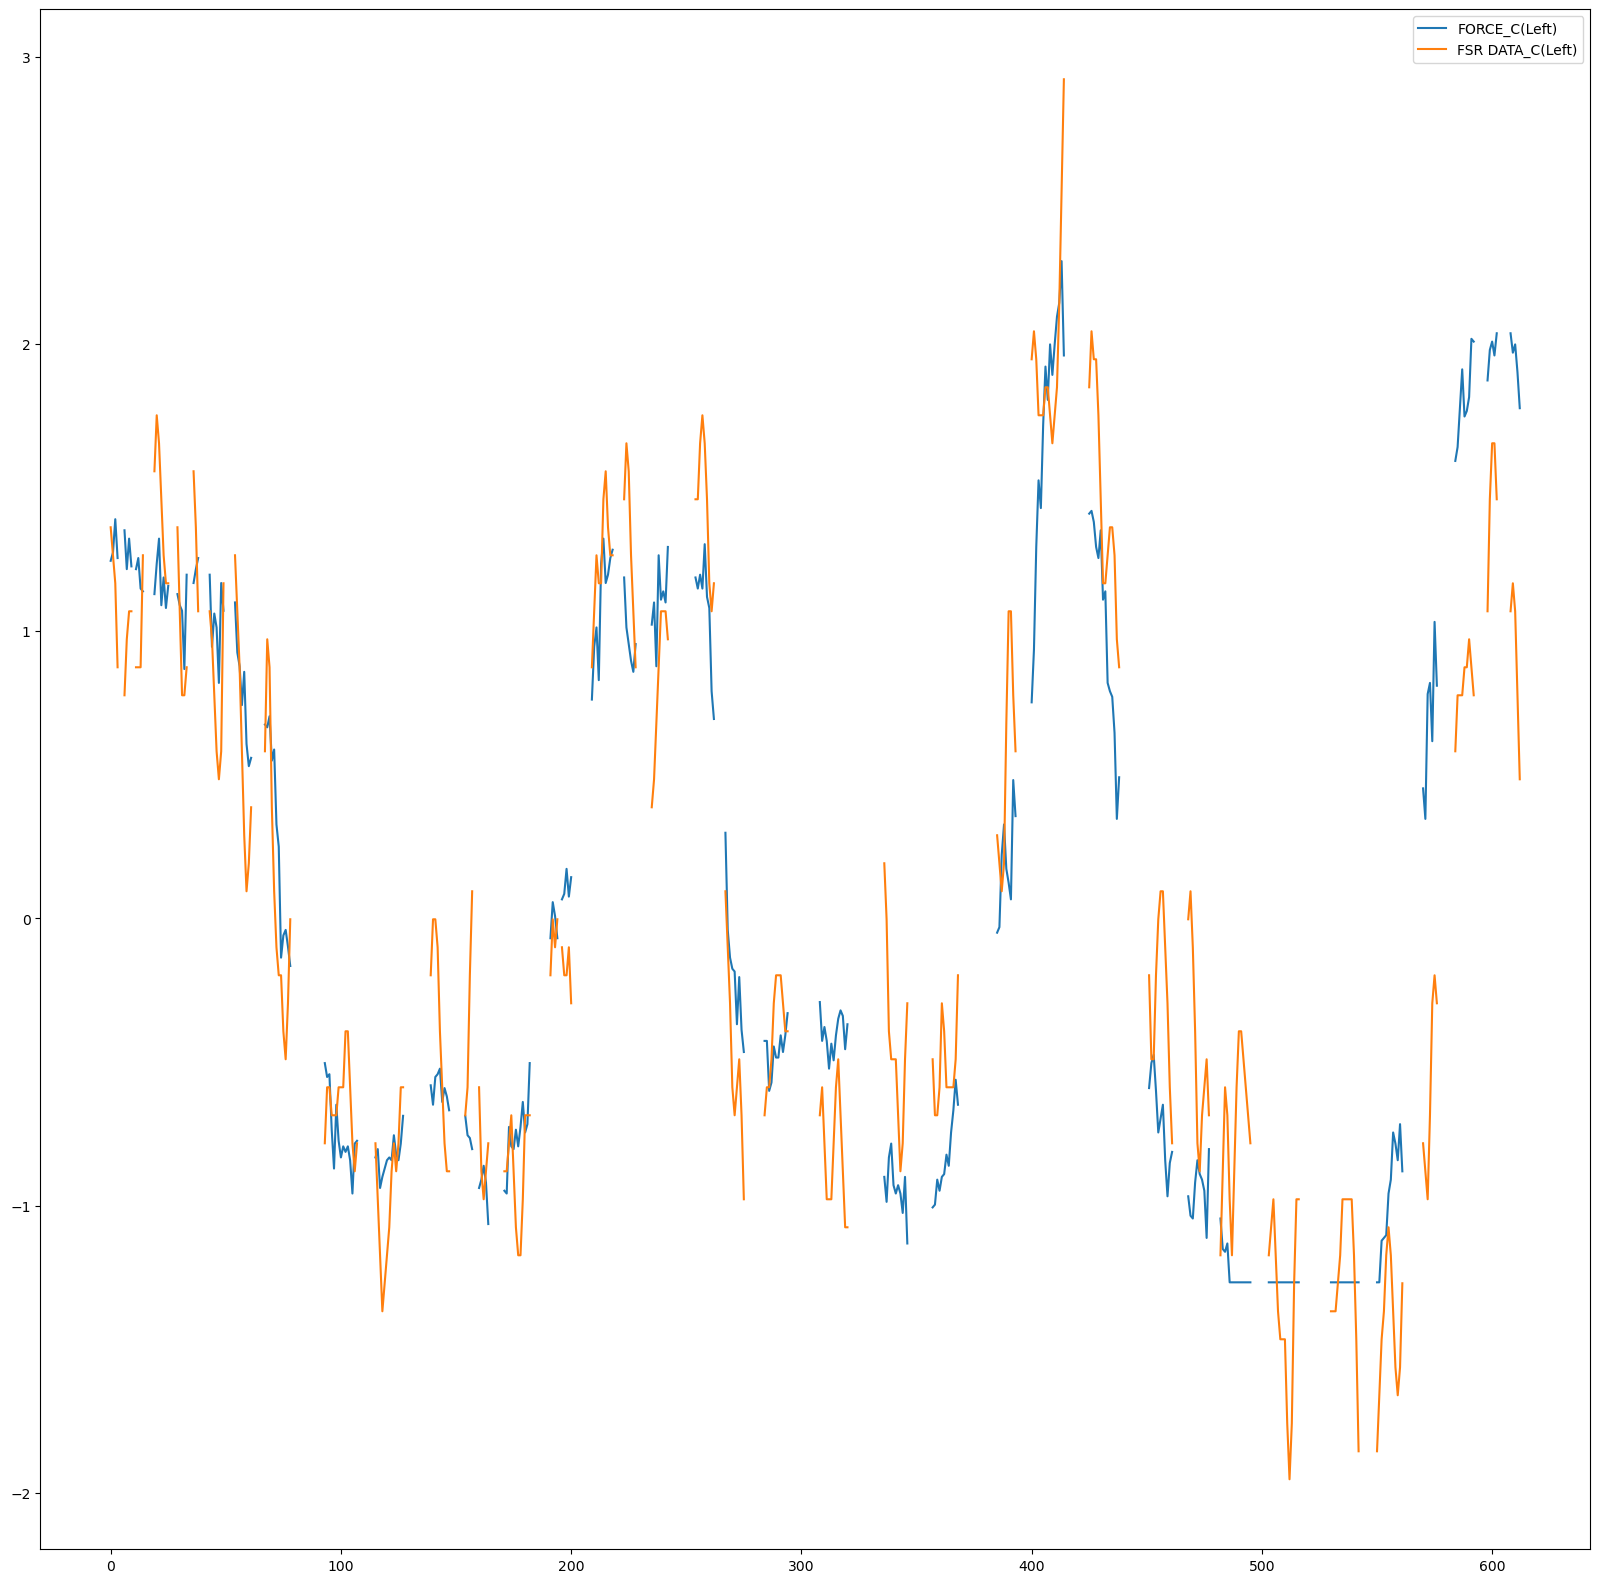

In [5]:
L.plot(figsize=(20,20))

In [6]:
print(R.columns)
print(L.columns)

Index(['FORCE_B(Right)', 'FSR DATA_B(Right)'], dtype='object')
Index(['FORCE_C(Left)', 'FSR DATA_C(Left)'], dtype='object')


<Axes: >

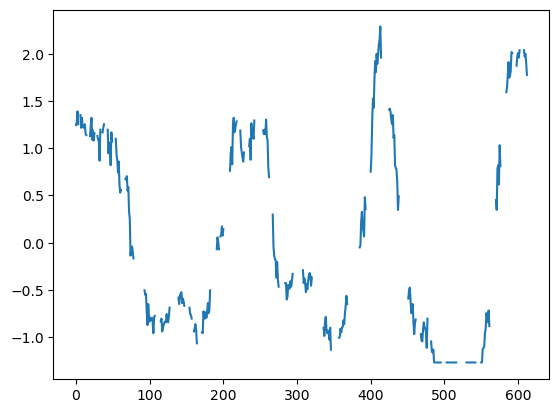

In [17]:
L['FORCE_C(Left)'].plot()

<Axes: >

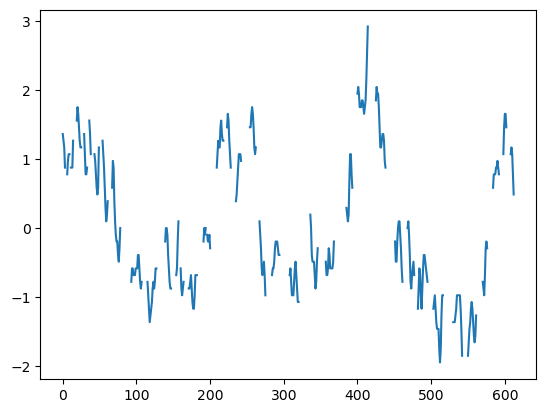

In [18]:
L['FSR DATA_C(Left)'].plot()

In [7]:
import numpy as np

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]
loss_index_R_FSR_B=np.array(R.index).reshape(-1,1)[R.iloc[:,1].isna()]

normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)
normal_index_R_FSR_B=np.setdiff1d(index,loss_index_R_FSR_B)

In [8]:
index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [11]:
x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

x_train_R_FSR_B=normal_index_R_FSR_B.reshape(-1,1)
y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [13]:
from xgboost.sklearn import XGBRegressor


reg = XGBRegressor().fit(x_train_R_FORECE_B,y_train_L_FORECE_C)
pred=reg.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_L_FORECE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

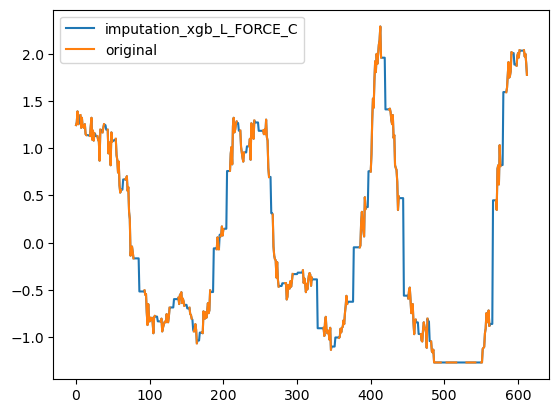

In [14]:

## asdfasdfasdfasdf
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_xgb_L_FORCE_C')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

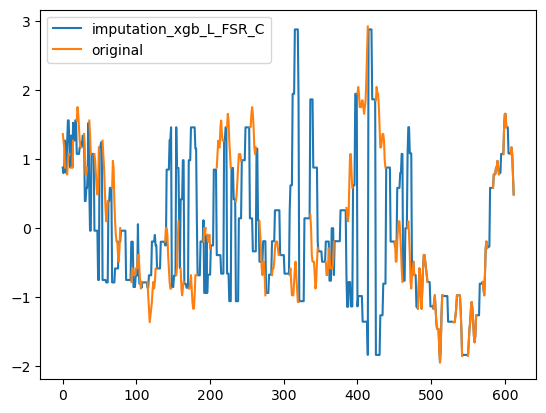

In [16]:
reg = XGBRegressor().fit(x_train_R_FSR_B,y_train_L_FSR_C)
pred=reg.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='imputation_xgb_L_FSR_C')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [19]:
L.isnull().sum()

FORCE_C(Left)       265
FSR DATA_C(Left)    265
dtype: int64

In [20]:
for i in loss_index_L_FORECE_C:    
    L['FORCE_C(Left)'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR DATA_C(Left)'][i]=L_FSR_C[i]
    

    
L.isnull().sum()

FORCE_C(Left)       0
FSR DATA_C(Left)    0
dtype: int64

<Axes: >

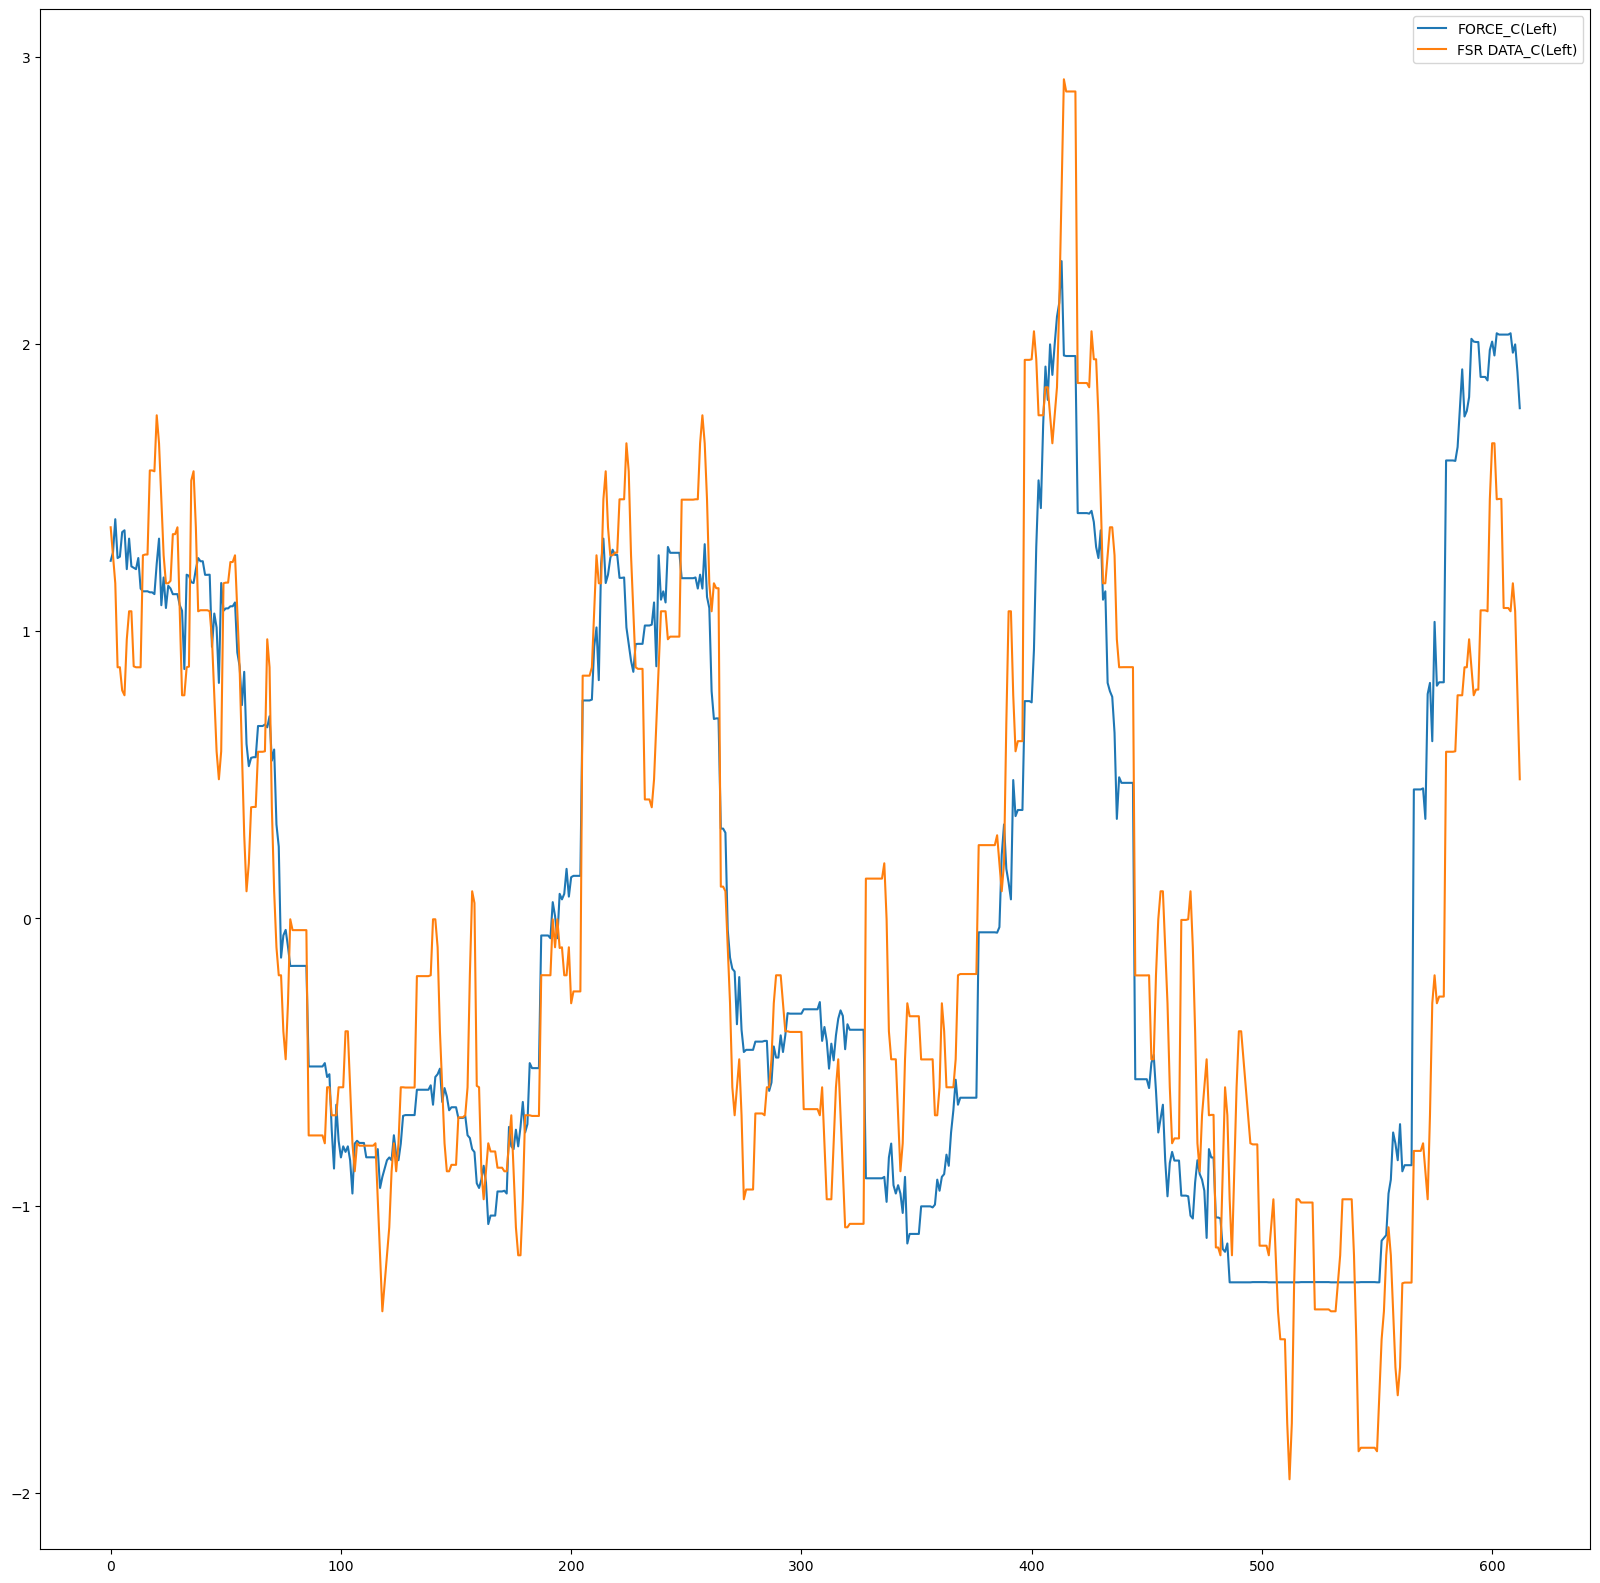

In [21]:
L.plot(figsize=(20,20))

In [22]:
L = pd.DataFrame(scaler.inverse_transform(L))

In [23]:
L_sca=L.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")

In [24]:
L_sca

,FORCE_C(Left),FSR DATA_C(Left)
0,42.626120,31.298461
1,43.310342,30.879103
2,46.047233,30.459746
3,42.854194,29.201674
4,42.966905,29.202192
...,...,...
608,61.328207,30.040389
609,59.731687,30.459746
610,60.415910,30.040389
611,58.135167,28.782317


<Axes: >

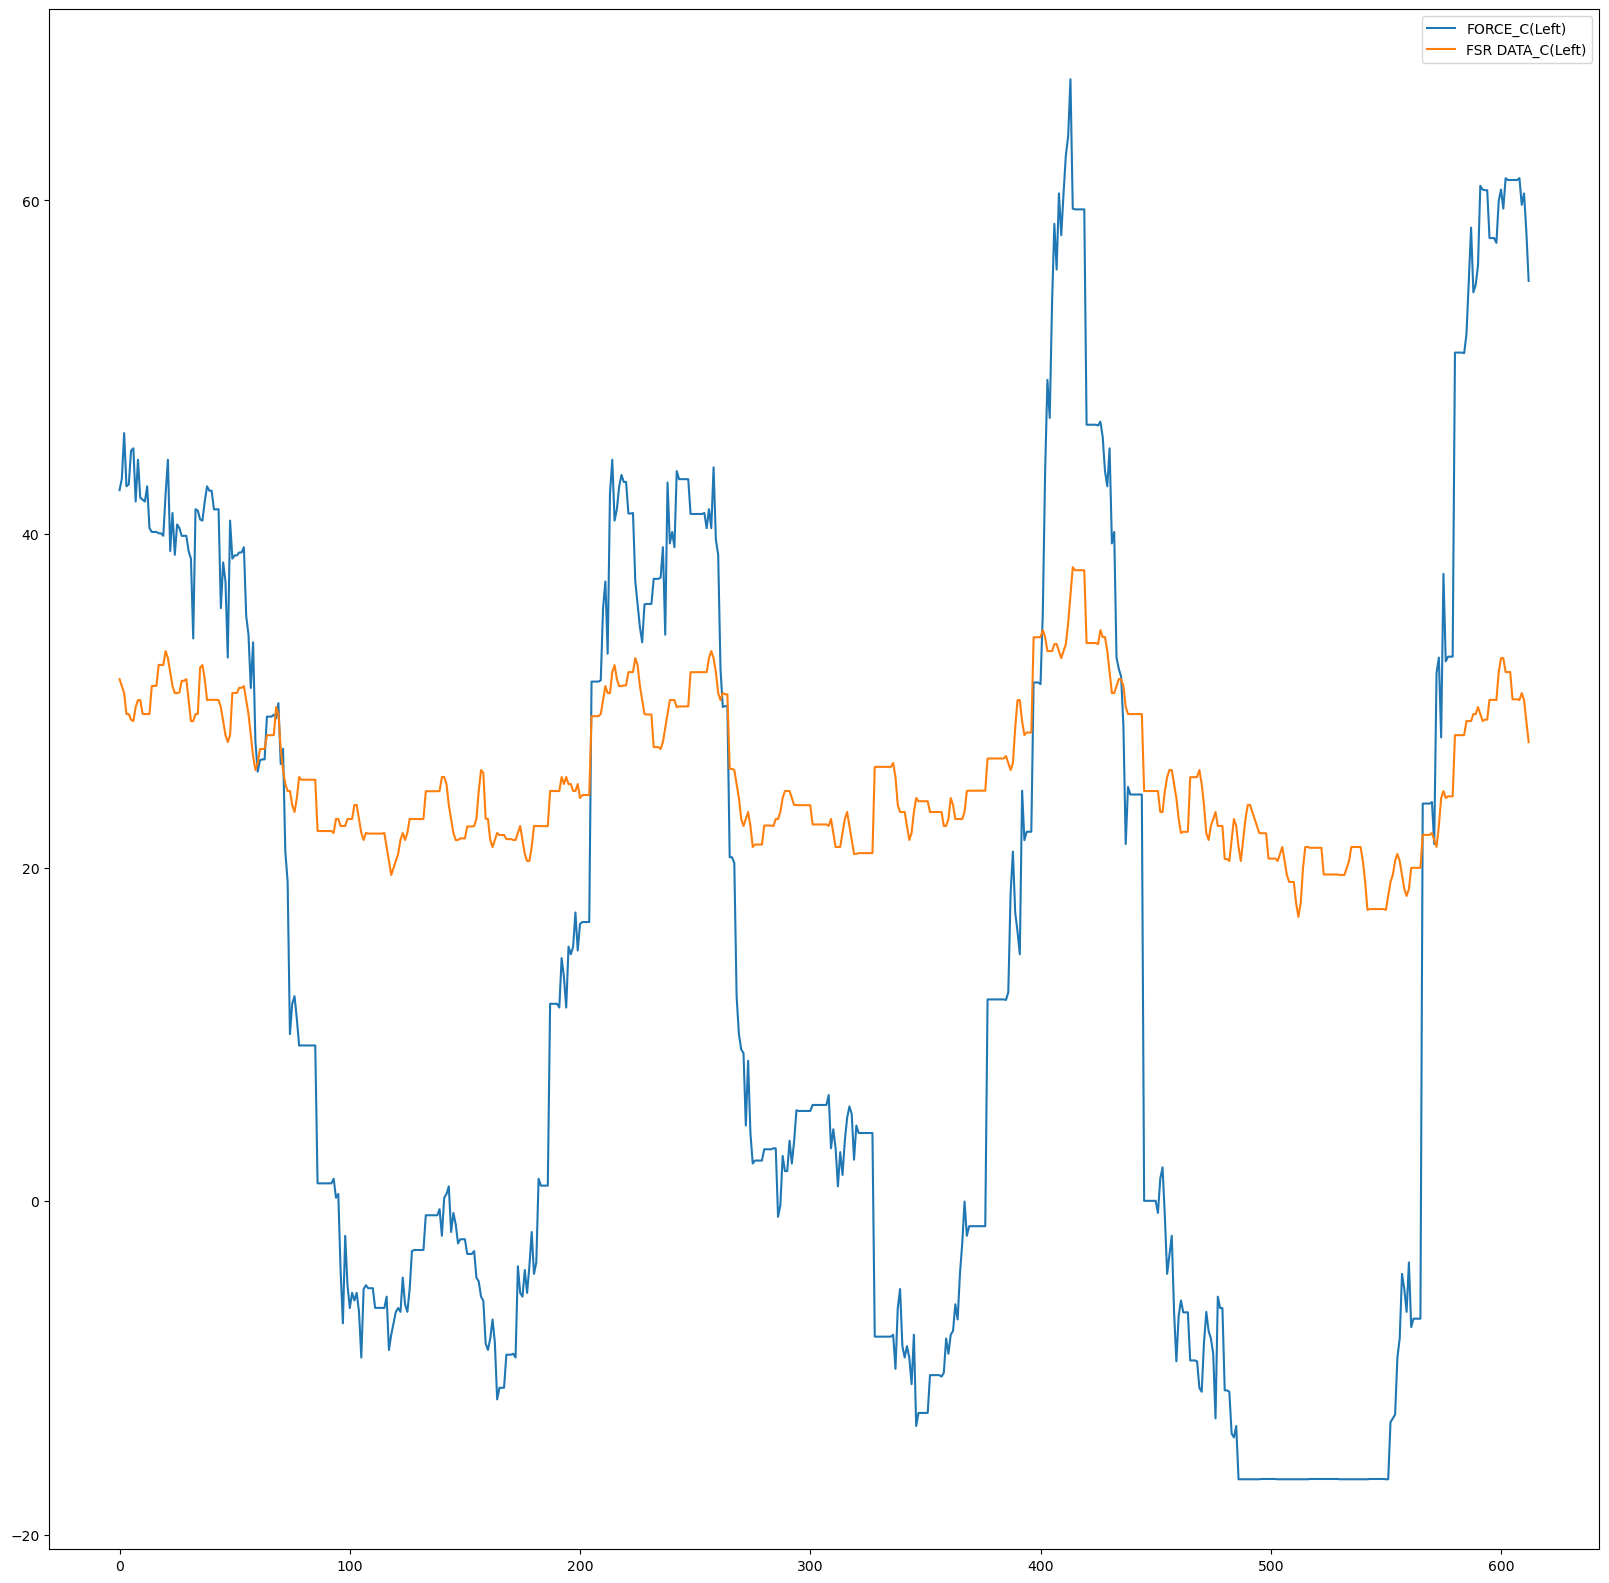

In [25]:
L_sca.plot(figsize=(20,20))